# 01-benson Challenges

In [32]:
%matplotlib inline
from __future__ import division
import csv
from datetime import datetime
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import numpy as np

### Challenge 1

In [56]:
with open('turnstile_150328.csv') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [57]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 
                       'EXITS']

In [58]:
print len(rows)
print type(rows)

192190
<type 'list'>


In [59]:
raw_readings_0328 = {}
for row in rows:
    raw_readings_0328.setdefault(tuple(row[:4]), []).append(row[4:])

### Challenge 2

In [60]:
datetime_cumulative_0328 = {turnstile: [(datetime.strptime(date + time,
                                            '%m/%d/%Y%X'),
                                        int(in_cumulative))
                                        for _, _, date, time,
                                            _, in_cumulative, _ in rows]
                 for turnstile, rows in raw_readings_0328.items()}

In [61]:
datetime_cumulative_0328.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [(datetime.datetime(2015, 3, 21, 0, 0), 5752280),
  (datetime.datetime(2015, 3, 21, 4, 0), 5752343),
  (datetime.datetime(2015, 3, 21, 8, 0), 5752368),
  (datetime.datetime(2015, 3, 21, 12, 0), 5752499),
  (datetime.datetime(2015, 3, 21, 16, 0), 5752799),
  (datetime.datetime(2015, 3, 21, 20, 0), 5753219),
  (datetime.datetime(2015, 3, 22, 0, 0), 5753428),
  (datetime.datetime(2015, 3, 22, 4, 0), 5753507),
  (datetime.datetime(2015, 3, 22, 8, 0), 5753526),
  (datetime.datetime(2015, 3, 22, 12, 0), 5753614),
  (datetime.datetime(2015, 3, 22, 16, 0), 5753874),
  (datetime.datetime(2015, 3, 22, 20, 0), 5754195),
  (datetime.datetime(2015, 3, 23, 0, 0), 5754385),
  (datetime.datetime(2015, 3, 23, 4, 0), 5754403),
  (datetime.datetime(2015, 3, 23, 8, 0), 5754517),
  (datetime.datetime(2015, 3, 23, 12, 0), 5754977),
  (datetime.datetime(2015, 3, 23, 16, 0), 5755446),
  (datetime.datetime(2015, 3, 23, 20, 0), 5756589),
  (datetime.datetime(2015, 

In [63]:
for key, rows in datetime_cumulative_0328.iteritems():
    rows = sorted(rows)

In [64]:
## Check that our timeseries is sorted (by datetime objects!)
for rows in datetime_cumulative_0328.values():
    assert rows == sorted(rows)

In [66]:
datetime_count_times_0328 = {turnstile: [[rows[i][0],
                                          rows[i+1][1] - rows[i][1],
                                          rows[i+1][0] - rows[i][0]]
                                         for i in range(len(rows) - 1)]
                    for turnstile, rows in datetime_cumulative_0328.items()}

In [67]:
datetime_count_times_0328.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [[datetime.datetime(2015, 3, 21, 0, 0), 63, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 21, 4, 0), 25, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 21, 8, 0), 131, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 21, 12, 0), 300, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 21, 16, 0), 420, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 21, 20, 0), 209, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 22, 0, 0), 79, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 22, 4, 0), 19, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 22, 8, 0), 88, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 22, 12, 0), 260, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 22, 16, 0), 321, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3, 22, 20, 0), 190, datetime.timedelta(0, 14400)],
  [datetime.datetime(2015, 3,

In [69]:
## Let's do some EDA!
all_counts = [count 
              for rows 
              in datetime_count_times_0328.values() 
              for _, count, _ in rows]
all_counts.sort()
print all_counts[-50:]

[2453, 2463, 2464, 2464, 2466, 2467, 2467, 2493, 2497, 2499, 2500, 2524, 2526, 2532, 2539, 2542, 2556, 2571, 2573, 2581, 2596, 2620, 2621, 2625, 2628, 2637, 2638, 2644, 2649, 2651, 2654, 2665, 2728, 2785, 2841, 2916, 2920, 2926, 2940, 2945, 2995, 3084, 3385, 4957, 10230, 13596, 83814175, 169801557, 367655512, 436524900]


In [70]:
print all_counts[:1200]

[-752058474, -7586280, -5983249, -1425128, -1262354, -268006, -257818, -192465, -53485, -21966, -1944, -1763, -1709, -1691, -1686, -1686, -1684, -1674, -1665, -1657, -1647, -1643, -1641, -1641, -1635, -1632, -1626, -1620, -1613, -1594, -1593, -1590, -1565, -1549, -1545, -1528, -1497, -1480, -1480, -1468, -1466, -1417, -1417, -1401, -1398, -1398, -1389, -1378, -1375, -1373, -1360, -1360, -1348, -1333, -1327, -1320, -1317, -1311, -1306, -1301, -1299, -1294, -1292, -1289, -1285, -1264, -1250, -1240, -1230, -1229, -1219, -1217, -1211, -1189, -1185, -1171, -1165, -1159, -1156, -1154, -1145, -1137, -1134, -1132, -1131, -1120, -1118, -1113, -1108, -1103, -1102, -1102, -1100, -1094, -1093, -1092, -1086, -1084, -1080, -1073, -1063, -1052, -1042, -1042, -1037, -1037, -1034, -1018, -1016, -1015, -1006, -1004, -997, -977, -976, -975, -967, -959, -953, -953, -947, -947, -940, -934, -926, -924, -920, -918, -908, -907, -906, -904, -901, -901, -900, -896, -892, -887, -886, -885, -883, -881, -880, -879

In [72]:
## Now let's do EDA on the times!
all_times = [duration.total_seconds() / 60 / 60
             for rows in datetime_count_times_0328.values()
             for _, _, duration in rows]
print Counter(all_times).most_common(10)

[(4.0, 172715), (4.2, 10551), (8.0, 210), (4.433333333333334, 150), (0.022500000000000003, 60), (0.02222222222222222, 59), (0.02388888888888889, 21), (2.230277777777778, 21), (1.5166666666666666, 21), (0.025833333333333333, 21)]


In [74]:
## Since these times look reasonable, let's just filter by reasonable counts.
datetime_counts_0328 = {turnstile: [(time, count)
                                    for (time, count, _) in rows
                                    if 0 <= count <= 5000]
                        for turnstile, rows in datetime_count_times_0328.items()}

datetime_counts_0328 is a solution to Challenge 2.

In [78]:
# check how much of the data we kept and some final EDA as a check
all_good_counts = [count 
                   for rows 
                   in datetime_counts_0328.values()
                   for _, count in rows]
print len(all_good_counts) / len(all_counts)
all_good_counts.sort()
print all_good_counts[-5:]
print all_good_counts[:5]

0.993988264325
[2945, 2995, 3084, 3385, 4957]
[0, 0, 0, 0, 0]


### Challenge 3

In [109]:
#get counts by day for each turnstile
day_counts_0328 = {}
for turnstile, rows in datetime_counts_0328.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts_0328[turnstile] = sorted(by_day.items())

In [110]:
day_counts_0328.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [(datetime.date(2015, 3, 21), 1148),
  (datetime.date(2015, 3, 22), 957),
  (datetime.date(2015, 3, 23), 2568),
  (datetime.date(2015, 3, 24), 2797),
  (datetime.date(2015, 3, 25), 2918),
  (datetime.date(2015, 3, 26), 2717),
  (datetime.date(2015, 3, 27), 2102)])

### Challenge 4

In [201]:
turnstile_0328 = sorted(day_counts_0328.items())[0][1]

In [202]:
dates_0328, counts_0328 = zip(*turnstile_0328)

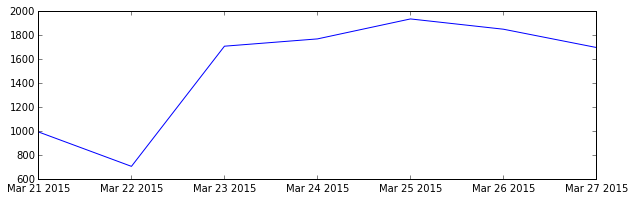

In [203]:
plt.figure(figsize=(10,3))
plt.plot(dates_0328, counts_0328)

### Challenge 5

In [197]:
day_counts_station_0328 = None
day_counts_station_0328 = defaultdict(list)
for (ca, scp, _, station), rows in day_counts_0328.items():
    tempkey = (ca, scp, station)
    day_counts_station_0328[tempkey].append(rows)

In [198]:
day_counts_station_0328.items()[0]

(('N325A', 'R218', 'ELMHURST AVE'),
 [[(datetime.date(2015, 3, 21), 1673),
   (datetime.date(2015, 3, 22), 1393),
   (datetime.date(2015, 3, 23), 2923),
   (datetime.date(2015, 3, 24), 3018),
   (datetime.date(2015, 3, 25), 3226),
   (datetime.date(2015, 3, 26), 2863),
   (datetime.date(2015, 3, 27), 2901)],
  [(datetime.date(2015, 3, 21), 151),
   (datetime.date(2015, 3, 22), 130),
   (datetime.date(2015, 3, 23), 316),
   (datetime.date(2015, 3, 24), 248),
   (datetime.date(2015, 3, 25), 234),
   (datetime.date(2015, 3, 26), 239),
   (datetime.date(2015, 3, 27), 179)],
  [(datetime.date(2015, 3, 21), 119),
   (datetime.date(2015, 3, 22), 106),
   (datetime.date(2015, 3, 23), 186),
   (datetime.date(2015, 3, 24), 140),
   (datetime.date(2015, 3, 25), 163),
   (datetime.date(2015, 3, 26), 150),
   (datetime.date(2015, 3, 27), 142)],
  [(datetime.date(2015, 3, 21), 1670),
   (datetime.date(2015, 3, 22), 1363),
   (datetime.date(2015, 3, 23), 2455),
   (datetime.date(2015, 3, 24), 2653),


### Challenge 6

In [199]:
for station, turnstiledata in day_counts_station_0328.items():
    by_day = {}
    for index, turnstile in enumerate(turnstiledata):
        for day, count in turnstile:
            by_day[day] = by_day.get(day, 0) + count
    day_counts_station_0328[station] = sorted(by_day.items())

In [200]:
day_counts_station_0328.items()[0]

(('N325A', 'R218', 'ELMHURST AVE'),
 [(datetime.date(2015, 3, 21), 9632),
  (datetime.date(2015, 3, 22), 8029),
  (datetime.date(2015, 3, 23), 14053),
  (datetime.date(2015, 3, 24), 14005),
  (datetime.date(2015, 3, 25), 14083),
  (datetime.date(2015, 3, 26), 13832),
  (datetime.date(2015, 3, 27), 13619)])

### Challenge 7

In [254]:
station_0328 = sorted(day_counts_station_0328.items())[0][1]

In [255]:
dates_0328, counts_0328 = zip(*station_0328)

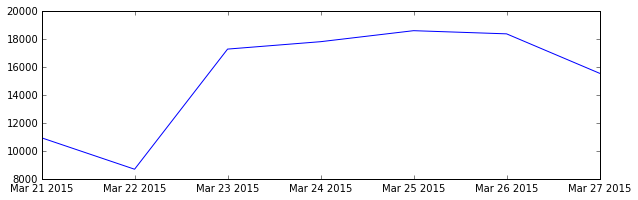

In [256]:
plt.figure(figsize=(10,3))
plt.plot(dates_0328, counts_0328)

### Challenge 8

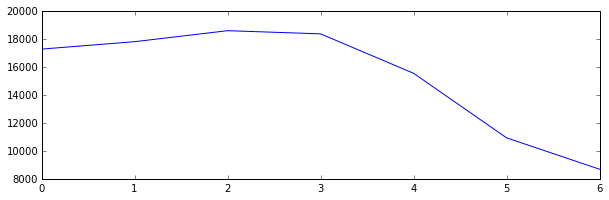

In [257]:
# re order data for weekday view
station_0328 = [[day.weekday(), count] for day, count in station_0328]
weekday, counts_0328 = zip(*sorted(station_0328))
plt.figure(figsize=(10,3))
plt.plot(weekday, counts_0328)

In [258]:
# get data for week 2

with open('turnstile_150404.csv') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]
    
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 
                       'EXITS']

print len(rows)
print type(rows)

raw_readings_0404 = {}
for row in rows:
    raw_readings_0404.setdefault(tuple(row[:4]), []).append(row[4:])
    
datetime_cumulative_0404 = {turnstile: [(datetime.strptime(date + time,
                                            '%m/%d/%Y%X'),
                                        int(in_cumulative))
                                        for _, _, date, time,
                                            _, in_cumulative, _ in rows]
                 for turnstile, rows in raw_readings_0404.items()}

for key, rows in datetime_cumulative_0404.iteritems():
    rows = sorted(rows)
    
datetime_count_times_0404 = {turnstile: [[rows[i][0],
                                          rows[i+1][1] - rows[i][1],
                                          rows[i+1][0] - rows[i][0]]
                                         for i in range(len(rows) - 1)]
                    for turnstile, rows in datetime_cumulative_0404.items()}

datetime_counts_0404 = {turnstile: [(time, count)
                                    for (time, count, _) in rows
                                    if 0 <= count <= 5000]
                        for turnstile, rows in datetime_count_times_0404.items()}

day_counts_0404 = {}
for turnstile, rows in datetime_counts_0404.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts_0404[turnstile] = sorted(by_day.items())
    
day_counts_station_0404 = None
day_counts_station_0404 = defaultdict(list)
for (ca, scp, _, station), rows in day_counts_0404.items():
    tempkey = (ca, scp, station)
    day_counts_station_0404[tempkey].append(rows)
    
for station, turnstiledata in day_counts_station_0404.items():
    by_day = {}
    for index, turnstile in enumerate(turnstiledata):
        for day, count in turnstile:
            by_day[day] = by_day.get(day, 0) + count
    day_counts_station_0404[station] = sorted(by_day.items())
    
station_0404 = sorted(day_counts_station_0404.items())[0][1]

station_0404 = [[day.weekday(), count] for day, count in station_0404]
weekday, counts_0404 = zip(*sorted(station_0404))

191385
<type 'list'>


In [259]:
# get data for week 3

with open('turnstile_150411.csv') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]
    
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 
                       'EXITS']

print len(rows)
print type(rows)

raw_readings_0411 = {}
for row in rows:
    raw_readings_0411.setdefault(tuple(row[:4]), []).append(row[4:])
    
datetime_cumulative_0411 = {turnstile: [(datetime.strptime(date + time,
                                            '%m/%d/%Y%X'),
                                        int(in_cumulative))
                                        for _, _, date, time,
                                            _, in_cumulative, _ in rows]
                 for turnstile, rows in raw_readings_0411.items()}

for key, rows in datetime_cumulative_0411.iteritems():
    rows = sorted(rows)
    
datetime_count_times_0411 = {turnstile: [[rows[i][0],
                                          rows[i+1][1] - rows[i][1],
                                          rows[i+1][0] - rows[i][0]]
                                         for i in range(len(rows) - 1)]
                    for turnstile, rows in datetime_cumulative_0411.items()}

datetime_counts_0411 = {turnstile: [(time, count)
                                    for (time, count, _) in rows
                                    if 0 <= count <= 5000]
                        for turnstile, rows in datetime_count_times_0411.items()}

day_counts_0411 = {}
for turnstile, rows in datetime_counts_0411.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts_0411[turnstile] = sorted(by_day.items())
    
day_counts_station_0411 = None
day_counts_station_0411 = defaultdict(list)
for (ca, scp, _, station), rows in day_counts_0411.items():
    tempkey = (ca, scp, station)
    day_counts_station_0411[tempkey].append(rows)
    
for station, turnstiledata in day_counts_station_0411.items():
    by_day = {}
    for index, turnstile in enumerate(turnstiledata):
        for day, count in turnstile:
            by_day[day] = by_day.get(day, 0) + count
    day_counts_station_0411[station] = sorted(by_day.items())
    
station_0411 = sorted(day_counts_station_0411.items())[0][1]

station_0411 = [[day.weekday(), count] for day, count in station_0411]
weekday, counts_0411 = zip(*sorted(station_0411))

192372
<type 'list'>


In [260]:
# get data for week 4

with open('turnstile_150418.csv') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]
    
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 
                       'EXITS']

print len(rows)
print type(rows)

raw_readings_0418 = {}
for row in rows:
    raw_readings_0418.setdefault(tuple(row[:4]), []).append(row[4:])
    
datetime_cumulative_0418 = {turnstile: [(datetime.strptime(date + time,
                                            '%m/%d/%Y%X'),
                                        int(in_cumulative))
                                        for _, _, date, time,
                                            _, in_cumulative, _ in rows]
                 for turnstile, rows in raw_readings_0418.items()}

for key, rows in datetime_cumulative_0418.iteritems():
    rows = sorted(rows)
    
datetime_count_times_0418 = {turnstile: [[rows[i][0],
                                          rows[i+1][1] - rows[i][1],
                                          rows[i+1][0] - rows[i][0]]
                                         for i in range(len(rows) - 1)]
                    for turnstile, rows in datetime_cumulative_0418.items()}

datetime_counts_0418 = {turnstile: [(time, count)
                                    for (time, count, _) in rows
                                    if 0 <= count <= 5000]
                        for turnstile, rows in datetime_count_times_0418.items()}

day_counts_0418 = {}
for turnstile, rows in datetime_counts_0418.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts_0418[turnstile] = sorted(by_day.items())
    
day_counts_station_0418 = None
day_counts_station_0418 = defaultdict(list)
for (ca, scp, _, station), rows in day_counts_0418.items():
    tempkey = (ca, scp, station)
    day_counts_station_0418[tempkey].append(rows)
    
for station, turnstiledata in day_counts_station_0418.items():
    by_day = {}
    for index, turnstile in enumerate(turnstiledata):
        for day, count in turnstile:
            by_day[day] = by_day.get(day, 0) + count
    day_counts_station_0418[station] = sorted(by_day.items())
    
station_0418 = sorted(day_counts_station_0418.items())[0][1]

station_0418 = [[day.weekday(), count] for day, count in station_0418]
weekday, counts_0418 = zip(*sorted(station_0418))

191662
<type 'list'>


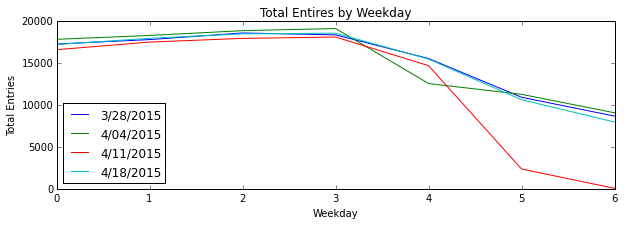

In [274]:
#plot weekly counts

plt.figure(figsize=(10,3))
plt.plot(weekday, counts_0328, label="3/28/2015")
plt.plot(weekday, counts_0404, label="4/04/2015")
plt.plot(weekday, counts_0411, label="4/11/2015")
plt.plot(weekday, counts_0418, label="4/18/2015")
plt.title('Total Entires by Weekday')
plt.ylabel('Total Entries')
plt.xlabel('Weekday')
plt.legend(loc=3)
plt.show()

### Challenge 9

In [275]:
#combine 4 weeks of data
station_list = [day_counts_station_0328, day_counts_station_0404, 
                day_counts_station_0411, day_counts_station_0418]

In [276]:
def combine_dics(diclist):
    dic_combined = {}
    for dic in diclist:
        for key, val in dic.iteritems():
            if not key in dic_combined:
                dic_combined[key] = val
            else:
                dic_combined[key] = dic_combined[key] + val
    return dic_combined

In [277]:
station_data = combine_dics(station_list)

In [279]:
sorted(station_data.items())[0]

(('A002', 'R051', 'LEXINGTON AVE'),
 [(datetime.date(2015, 3, 21), 10938),
  (datetime.date(2015, 3, 22), 8686),
  (datetime.date(2015, 3, 23), 17298),
  (datetime.date(2015, 3, 24), 17829),
  (datetime.date(2015, 3, 25), 18618),
  (datetime.date(2015, 3, 26), 18391),
  (datetime.date(2015, 3, 27), 15564),
  (datetime.date(2015, 3, 28), 11286),
  (datetime.date(2015, 3, 29), 9082),
  (datetime.date(2015, 3, 30), 17859),
  (datetime.date(2015, 3, 31), 18319),
  (datetime.date(2015, 4, 1), 18894),
  (datetime.date(2015, 4, 2), 19148),
  (datetime.date(2015, 4, 3), 12577),
  (datetime.date(2015, 4, 4), 2365),
  (datetime.date(2015, 4, 5), 55),
  (datetime.date(2015, 4, 6), 16619),
  (datetime.date(2015, 4, 7), 17531),
  (datetime.date(2015, 4, 8), 17970),
  (datetime.date(2015, 4, 9), 18134),
  (datetime.date(2015, 4, 10), 14713),
  (datetime.date(2015, 4, 11), 10642),
  (datetime.date(2015, 4, 12), 7981),
  (datetime.date(2015, 4, 13), 17236),
  (datetime.date(2015, 4, 14), 17982),
  (da

In [312]:
#reduce to total count for each station over 4 week period
station_total_counts = {}
for station, days in station_data.items():
    for day, count in days:
        station_total_counts[station] = (station_total_counts.get(station, 0) 
                                         + count)

In [313]:
sorted(station_total_counts.items())[0]

(('A002', 'R051', 'LEXINGTON AVE'), 408325)

In [337]:
station_totals = sorted(station_total_counts.items(), key=lambda x: x[1], 
                        reverse=True)

### Challenge 10

(array([ 406.,  199.,   70.,   32.,    9.,    4.,    3.,    1.,    1.,    1.]),
 array([       0. ,   158744.7,   317489.4,   476234.1,   634978.8,
          793723.5,   952468.2,  1111212.9,  1269957.6,  1428702.3,
         1587447. ]),
 <a list of 10 Patch objects>)

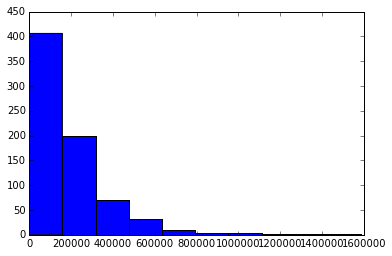

In [339]:
# histogram to visualize 

station, totalcount = zip(*station_totals)
plt.hist(totalcount)

<Container object of 15 artists>

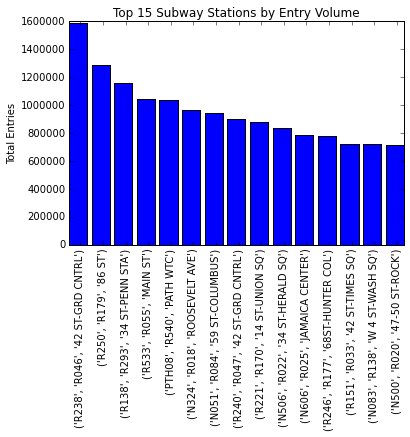

In [353]:
#plot top 15 stations

pos = np.arange(len(totalcount[:15]))
width = 1.0

ax = plt.axes()
ax.set_ylabel('Total Entries')
ax.set_xticks(pos + width / 2)
ax.set_xticklabels(station[:15])
plt.xticks(rotation = 90)
plt.title('Top 15 Subway Stations by Entry Volume')

indices = range(len(totalcount))
plt.bar(indices[:15], totalcount[:15])